# **Importing the libraries**

In [16]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings("ignore")

# **Load Dataset**

In [3]:
# Load Dataset
data = pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Dimensions of the Dataset
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **Slicing data**

In [8]:
# Slicing data
X = data.iloc[:, [0, 2]].values
y = data.iloc[:, -1].values
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **Declare feature vector and target variable and droping 'fbs' for more accuracy.**

In [38]:
# declare feature vector and target variable
X = data.drop(['slope','ca'], axis=1)
y = data['thal']

# **Split the data into tarin and test**

In [11]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print(f"Shape train features :{X_train.shape}")
print(f"Shape train labels :{y_train.shape}")
print(f"Shape test features :{X_test.shape}")
print(f"Shape test labels :{y_test.shape}")

Shape train features :(242, 13)
Shape train labels :(242,)
Shape test features :(61, 13)
Shape test labels :(61,)


# **Encode categorical variables with ordinal encoding**

In [13]:
# encode categorical variables with ordinal encoding
encoder = OrdinalEncoder()
#encoder = OrdinalEncoder(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# **Instantiate the DecisionTreeClassifier model**

In [35]:
# Instantiate the DecisionTreeClassifier model
model = RandomForestClassifier(criterion='log_loss',random_state=0,n_estimators=10,max_depth=5)
model.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
model

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=10,
                       random_state=0)

In [26]:
# view the feature scores
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

11    0.530395
12    0.088118
7     0.087559
4     0.055284
1     0.045137
3     0.033305
8     0.029777
9     0.029210
10    0.026793
0     0.026537
2     0.020499
5     0.019345
6     0.008041
dtype: float64

# **Let check the accuracy**

In [39]:
#Let check the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Train accuracy
y_train_predict = model.predict(X_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

# Test accuracy
y_test_predict = model.predict(X_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y_test,y_test_predict)*100))

Accuracy: 0.9230769230769231
Model accuracy for training data : 98.58%
Model accuracy for validation data : 92.31%


# **Declare feature vector and target variable**

In [29]:
# declare feature vector and target variable
X = data.drop(['ca','slope'], axis=1)
y = data['thal']

# **Split the data into training and test sets for BernoulliNB**

In [30]:
#Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# **Encode categorical variables with ordinal encoding**

In [31]:
# Encode categorical variables with ordinal encoding
encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# **Training the Naive Bayes model of BernoulliNB training set**

In [32]:
# Training the Naive Bayes model on the Training set
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

# **Predicting the Test set results**

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print("Predicted Test Results : \n",y_pred)

Predicted Test Results : 
 [2 2 3 2 2 3 2 3 2 3 2 3 3 2 3 3 2 2 3 2 2 2 3 3 2 3 3 2 2 2 2 2 2 3 2 2 2
 3 2 3 3 3 3 2 2 3 3 3 2 2 2 3 2 3 3 3 2 3 3 3 2 3 3 3 2 3 3 2 2 2 3 2 2 3
 2 3 2 3 2 3 2 2 2 2 3 3 2 3 3 2 2]


# **Making the Confusion Matrix**

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
print("Model Accuracy : ",ac)
print("Model Accuracy in %: ",ac*100,"%")
model_score = model.score(X_test, y_test)
print('Model Score : ',model_score)
print('Model Score in %: ',model_score*100,"%")
cm = confusion_matrix(y_test, y_pred)
print("Model Confusion Matrix : ")
print(cm)

Model Accuracy :  0.9230769230769231
Model Accuracy in %:  92.3076923076923 %
Model Score :  0.9230769230769231
Model Score in %:  92.3076923076923 %
Model Confusion Matrix : 
[[ 0  0  1  0]
 [ 0  0  6  0]
 [ 0  0 47  0]
 [ 0  0  0 37]]


# **Get the confusion matrix**

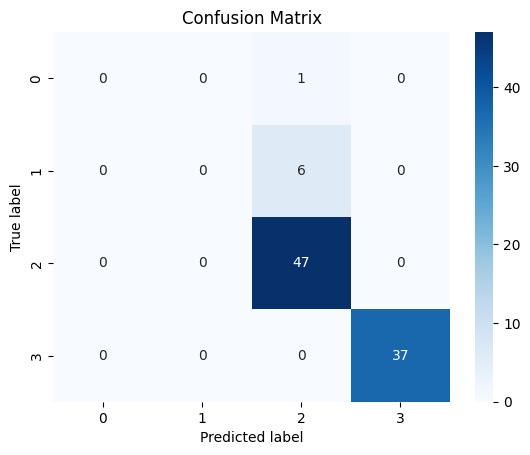

In [40]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()